In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [49]:
df_up_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_up.txt', sep="\t", header=0, index_col=0)
df_up_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_down.txt', sep="\t", header=0, index_col=0)
df_down_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_up.txt', sep="\t", header=0, index_col=0)
df_down_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_down.txt', sep="\t", header=0, index_col=0)

dfs = [df_up_up, df_up_down, df_down_up, df_down_down]
for d in dfs:
    d.index = [i.split(":")[1] for i in d.index]

In [170]:
df_mobile = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Thieme et al., 2015/41477_2015_BFnplants201525_MOESM2_ESM.txt', header=0, index_col=0, sep="\t", skiprows=1)
# df_mobile = df_mobile.dropna()

In [91]:
mobile_genes = list(df_mobile.iloc[:,0].values)

In [66]:
len(mobile_genes)

3630

In [92]:
up_up_mobile = np.intersect1d(mobile_genes, df_up_up.index)
up_down_mobile = np.intersect1d(mobile_genes, df_up_down.index)
down_up_mobile = np.intersect1d(mobile_genes, df_down_up.index)
down_down_mobile = np.intersect1d(mobile_genes, df_down_down.index)

In [93]:
print(len(up_up_mobile)/len(df_up_up))
up_up_mobile

0.391304347826087


array(['AT1G75750', 'AT1G76160', 'AT2G23120', 'AT2G43150', 'AT3G44300',
       'AT4G02380', 'AT4G33720', 'AT5G07440', 'AT5G64570'], dtype=object)

In [94]:
print(len(up_down_mobile)/len(df_up_down))
up_down_mobile

0.5384615384615384


array(['AT1G02205', 'AT1G16410', 'AT1G18570', 'AT1G64950', 'AT2G05510',
       'AT2G17040', 'AT3G50770', 'AT3G50930', 'AT4G02410', 'AT4G23680',
       'AT4G26850', 'AT4G39950', 'AT5G24210', 'AT5G42050'], dtype=object)

In [95]:
print(len(down_up_mobile)/len(df_down_up))
down_up_mobile

0.5161290322580645


array(['AT1G01620', 'AT1G09570', 'AT1G11260', 'AT1G57680', 'AT2G25430',
       'AT2G42580', 'AT2G45180', 'AT3G16240', 'AT3G30775', 'AT3G60320',
       'AT4G12730', 'AT4G13340', 'AT4G26690', 'AT5G51550', 'AT5G52882',
       'AT5G65730'], dtype=object)

In [96]:
print(len(down_down_mobile)/len(df_down_down))
down_down_mobile

0.25252525252525254


array(['AT1G11050', 'AT1G13260', 'AT1G32920', 'AT1G61470', 'AT1G68840',
       'AT1G70850', 'AT1G75960', 'AT2G01520', 'AT2G18050', 'AT2G41640',
       'AT3G45640', 'AT3G55980', 'AT3G56360', 'AT4G11280', 'AT4G17500',
       'AT4G19170', 'AT4G23670', 'AT4G24380', 'AT4G24570', 'AT4G29780',
       'AT4G37260', 'AT5G01820', 'AT5G47230', 'AT5G59450', 'AT5G61440'],
      dtype=object)

In [97]:
df_deltaN_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/downregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

dfs = [df_deltaN_up, df_deltaN_down]
for d in dfs:
    d.index = [i.split(":")[1] for i in d.index]

In [98]:
up_mobile = np.intersect1d(mobile_genes, df_deltaN_up.index)
print("up mobile")
print(len(up_mobile)/len(df_deltaN_up))
print(up_mobile)

down_mobile = np.intersect1d(mobile_genes, df_deltaN_down.index)
print("\n")
print("down mobile")
print(len(down_mobile)/len(df_deltaN_down))
print(down_mobile)

up mobile
0.42857142857142855
['AT1G01620' 'AT1G09570' 'AT1G11260' 'AT1G57680' 'AT1G62480' 'AT1G75750'
 'AT1G76160' 'AT2G23120' 'AT2G25430' 'AT2G42580' 'AT2G43150' 'AT2G45180'
 'AT3G16240' 'AT3G30775' 'AT3G44300' 'AT3G45970' 'AT3G54920' 'AT3G60140'
 'AT3G60320' 'AT4G02380' 'AT4G12730' 'AT4G13340' 'AT4G26690' 'AT4G33720'
 'AT4G34950' 'AT5G07440' 'AT5G51550' 'AT5G52882' 'AT5G64570' 'AT5G65730']


down mobile
0.3313253012048193
['AT1G02205' 'AT1G06040' 'AT1G11050' 'AT1G13260' 'AT1G16410' 'AT1G18570'
 'AT1G22770' 'AT1G25550' 'AT1G32920' 'AT1G51700' 'AT1G61470' 'AT1G62180'
 'AT1G64950' 'AT1G68840' 'AT1G70850' 'AT1G71880' 'AT1G72900' 'AT1G75960'
 'AT2G01520' 'AT2G05510' 'AT2G17040' 'AT2G18050' 'AT2G40140' 'AT2G41640'
 'AT2G44080' 'AT2G46600' 'AT3G02020' 'AT3G16720' 'AT3G19710' 'AT3G29000'
 'AT3G29035' 'AT3G45640' 'AT3G50770' 'AT3G50930' 'AT3G55980' 'AT3G56360'
 'AT4G02410' 'AT4G11280' 'AT4G17500' 'AT4G19170' 'AT4G23670' 'AT4G23680'
 'AT4G24380' 'AT4G24570' 'AT4G26850' 'AT4G29780' 'AT4G37260'

In [99]:
df_fC = pd.read_csv(f'/Users/siomi19/Desktop/AtAgo1 RNA-seq/featureCounts/results/AtAgo1_RNA-seq_featureCounts_gene.txt',
                        skiprows=1,
                        sep="\t",
                        header=0,
                        index_col=0,
                        usecols=[0,6,7,8,9,10,11,12,13]
                        )

In [100]:
df_deltaN_lfc = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/AtAgo1_RNA-seq_featureCounts_gene_WT_AGO1_deltaN_DESeq2.txt', header=0, index_col=0, sep="\t")
df_deltaN_lfc.index = [i.split(":")[1] for i in df_deltaN_lfc.index]

In [102]:
not_exist = ['AT2G01010', 'AT2G07709', 'AT2G07711', 'AT2G07717', 'AT2G18440', 'AT3G33072', 'AT3G41768', 'AT3G42658', 'AT4G03060', 'AT5G49080', 'AT1G30835', 'AT1G46554', 'AT1G67105', 'AT2G13970', 'AT2G14878', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT3G54366', 'AT5G28626', 'AT5G59732']

for i in not_exist:
    mobile_genes.remove(i)

In [104]:
non_mobile_genes = np.setdiff1d(df_deltaN_lfc.index, mobile_genes)

In [107]:
df_deltaN_lfc_mobile = df_deltaN_lfc.loc[mobile_genes]
df_deltaN_lfc_non_mobile = df_deltaN_lfc.loc[non_mobile_genes]

In [117]:
mobile = df_deltaN_lfc_mobile["log2FC"].dropna().values
non_mobile = df_deltaN_lfc_non_mobile["log2FC"].dropna().values

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f823aec3310>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f823aca4c40>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f823aec3bb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f823aec3f10>}

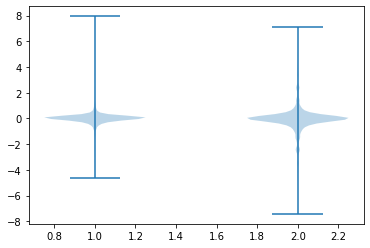

In [118]:
plt.violinplot([mobile, non_mobile])
# plt.boxplot([df_deltaN_lfc_nuc["log2FC"].dropna().values, df_deltaN_lfc_cyt["log2FC"].dropna().values])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f823b1c2ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f823b1d1640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f823b1c2b50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f823b1d1d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f823b1de130>,
 'means': []}

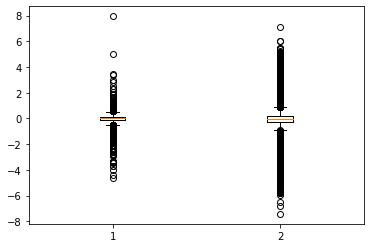

In [119]:
plt.boxplot([mobile, non_mobile])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f823b65d520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f823b65dc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f823b65d190>,
 'medians': [<matplotlib.lines.Line2D at 0x7f823b6673a0>,
 'fliers': [],
 'means': []}

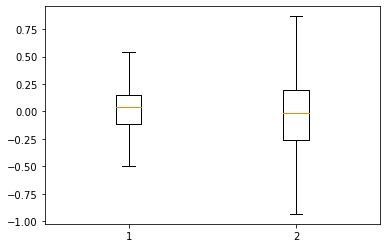

In [120]:
plt.boxplot([mobile, non_mobile], sym="")

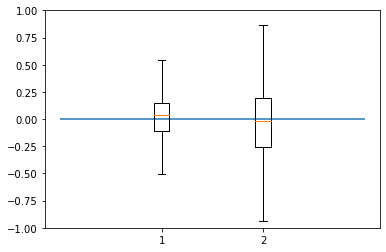

In [121]:
plt.boxplot([mobile, non_mobile], sym="")
plt.ylim(-1,1)
plt.hlines(0, 0, 3)

In [122]:
A_var = np.var(mobile, ddof=1)  # Aの不偏分散
B_var = np.var(non_mobile, ddof=1)  # Bの不偏分散
A_df = len(mobile) - 1  # Aの自由度
B_df = len(non_mobile) - 1  # Bの自由度
f = A_var / B_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        0.233
p-value:  0.0


In [123]:
stats.ttest_ind(mobile, non_mobile, equal_var=False)

Ttest_indResult(statistic=6.833754887216591, pvalue=8.746983612120315e-12)

In [303]:
df_nuc = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Liu et al., 2018/Nuclear_AGO1_targets.txt', header=0, index_col=0, sep="\t", skiprows=1)
df_nuc = df_nuc.dropna()
df_cyt = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_ago1_0.05_0_BH.csv', header=0, index_col=0, sep="\t")
nuc_genes = [i.upper() for i in df_nuc["Gene ID"].values]
cyt_genes = [i.split(":")[1].upper() for i in df_cyt.index]

In [309]:
# nuc_genes.remove('AT1G22767')
# nuc_genes.remove('AT5G19729')
# cyt_genes.remove('AT1G22767')
# cyt_genes.remove('AT5G19729')

ValueError: list.remove(x): x not in list

In [310]:
nuc = df_deltaN_lfc.loc[nuc_genes, "log2FC"].dropna().values
cyt = df_deltaN_lfc.loc[cyt_genes, "log2FC"].dropna().values
mobile = df_deltaN_lfc.loc[mobile_genes, "log2FC"].dropna().values
non_mobile = df_deltaN_lfc.loc[non_mobile_genes, "log2FC"].dropna().values
nuc_mobile = df_deltaN_lfc.loc[np.intersect1d(nuc_genes, mobile_genes), "log2FC"].dropna().values
nuc_non_mobile = df_deltaN_lfc.loc[np.intersect1d(nuc_genes, non_mobile_genes), "log2FC"].dropna().values
cyt_mobile = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_genes), "log2FC"].dropna().values
cyt_non_mobile = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, non_mobile_genes), "log2FC"].dropna().values

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8238c32130>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8238c32d90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8238d05940>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8238d05640>}

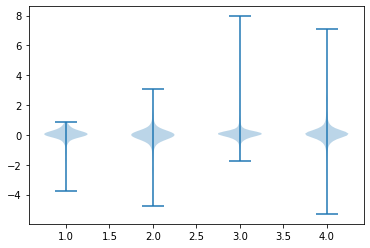

In [311]:
plt.violinplot([nuc_mobile, nuc_non_mobile, cyt_mobile, cyt_non_mobile])

In [312]:
df_nuc_mobile = pd.DataFrame({"nuc_mobile":nuc_mobile})
df_nuc_non_mobile = pd.DataFrame({"nuc_non_mobile":nuc_non_mobile})
df_cyt_mobile = pd.DataFrame({"cyt_mobile":cyt_mobile})
df_cyt_non_mobile = pd.DataFrame({"cyt_non_mobile":cyt_non_mobile})

In [313]:
df_cat = pd.concat([df_nuc_mobile, df_nuc_non_mobile, df_cyt_mobile, df_cyt_non_mobile], axis=1)
df_cat_melt = df_cat.melt()

In [314]:
df_cat_melt

,variable,value
0,nuc_mobile,-0.268931
1,nuc_mobile,0.454169
2,nuc_mobile,0.546842
3,nuc_mobile,-0.067023
4,nuc_mobile,-0.089388
...,...,...
11267,cyt_non_mobile,0.304629
11268,cyt_non_mobile,0.578499
11269,cyt_non_mobile,0.090531
11270,cyt_non_mobile,0.506427


<AxesSubplot:xlabel='variable', ylabel='value'>

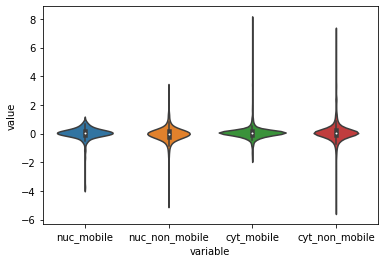

In [315]:
sns.violinplot(x='variable', y='value', data=df_cat_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

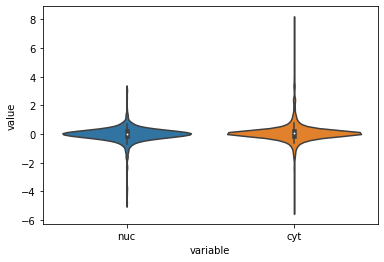

In [316]:
df_nuc = pd.DataFrame({"nuc":nuc})
df_cyt = pd.DataFrame({"cyt":cyt})
df_cat_loc_melt = pd.concat([df_nuc, df_cyt], axis=1).melt()
sns.violinplot(x='variable', y='value', data=df_cat_loc_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

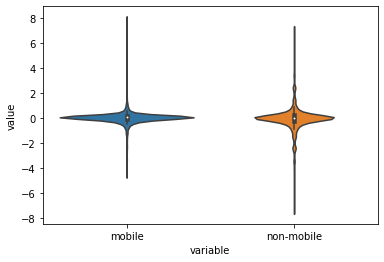

In [167]:
df_m = pd.DataFrame({"mobile":mobile})
df_n_m = pd.DataFrame({"non-mobile":non_mobile})
df_cat_loc_melt = pd.concat([df_m, df_n_m], axis=1).melt()
sns.violinplot(x='variable', y='value', data=df_cat_loc_melt)

In [207]:
np.abs(mobile)

array([0.025883  , 0.11038148, 2.85040787, ..., 0.01682886, 0.00963853,
       0.05811176])

In [190]:
df_mobile_value = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Thieme et al., 2015/41477_2015_BFnplants201525_MOESM2_ESM_1.txt', header=1, index_col=0, sep="\t", skipfooter=1)
mobile_value_index = np.setdiff1d(df_mobile_value.index, ['AT1G30835', 'AT1G46554', 'AT1G67105', 'AT2G13970', 'AT2G14878', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT3G54366', 'AT5G28626', 'AT5G59732'])

/Users/siomi19/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


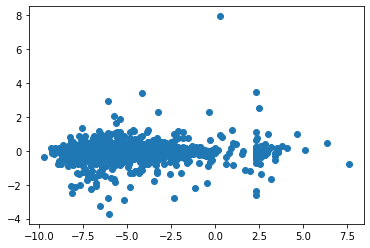

In [252]:
plt.scatter(df_mobile_value.loc[mobile_value_index, 'Unnamed: 14'], df_deltaN_lfc.loc[mobile_value_index, "log2FC"])
# plt.axis('square')
# plt.ylim(-5,4)

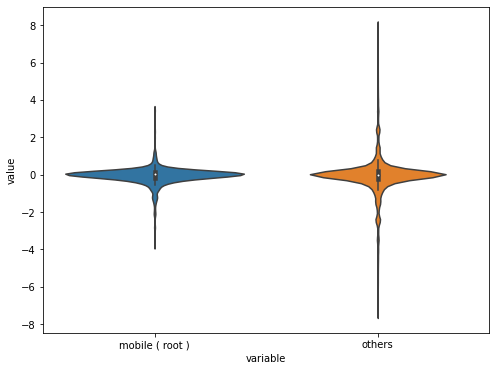

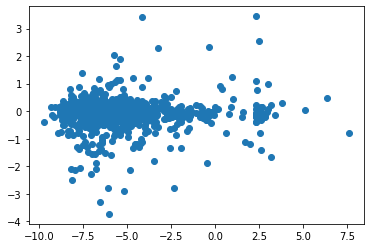

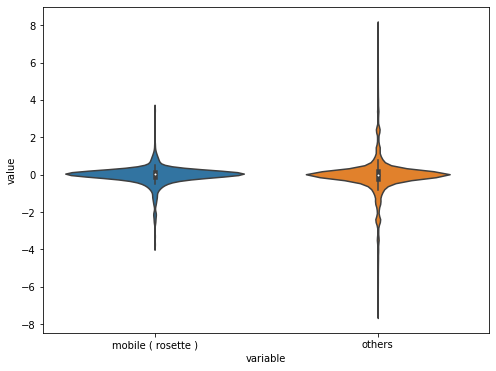

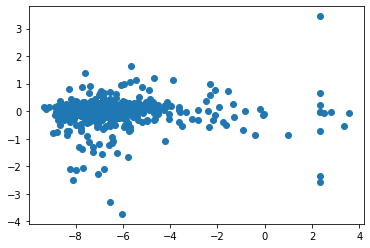

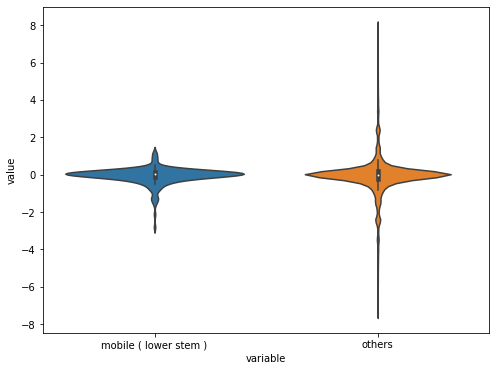

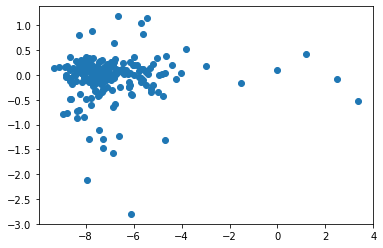

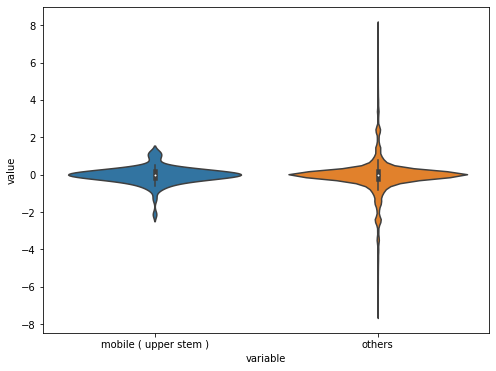

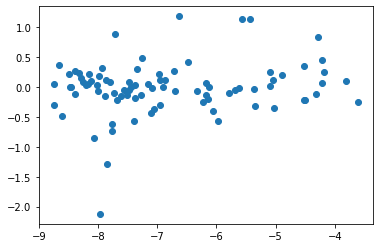

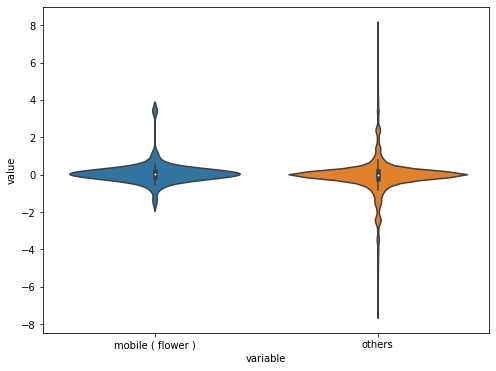

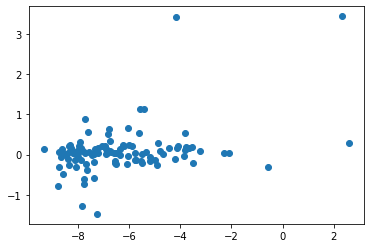

In [294]:
tissues = ["root", "rosette", "lower stem", "upper stem", "flower"]

for t in tissues:
    mobile_t_index = list(df_mobile_value[t].dropna().index)
    
    for ne in not_exist:
        try:
            mobile_t_index.remove(ne)
        except ValueError:
            pass
    mobile_t = df_deltaN_lfc.loc[mobile_t_index, "log2FC"]

    others_index = np.setdiff1d(df_deltaN_lfc.index, mobile_t)
    others = df_deltaN_lfc.loc[others_index, "log2FC"]
    
    df_m = pd.DataFrame({f"mobile ( {t} )":mobile_t})
    df_n_m = pd.DataFrame({"others":others})
    df_cat_loc_t_melt = pd.concat([df_m, df_n_m], axis=1).melt()
    plt.figure(figsize=(8,6))
    sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)
    plt.figure()
    plt.scatter(df_mobile_value.loc[mobile_t_index, 'Unnamed: 14'], df_deltaN_lfc.loc[mobile_t_index, "log2FC"])

In [271]:
not_exist = not_exist + ['AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']

In [277]:
not_exist = list(set(not_exist))

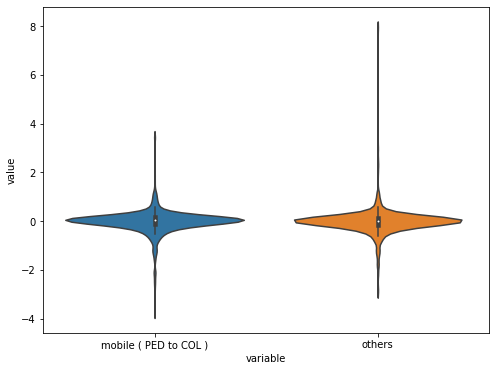

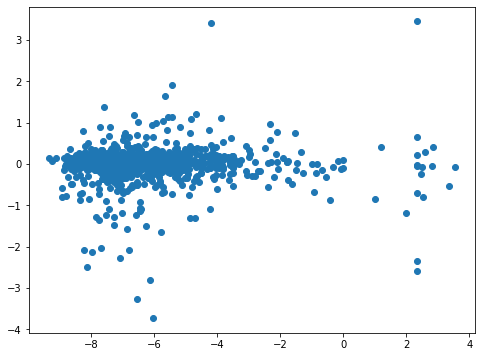

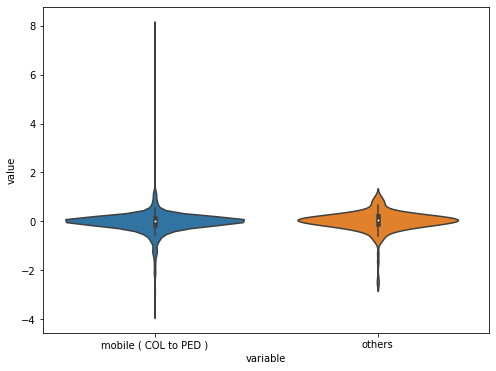

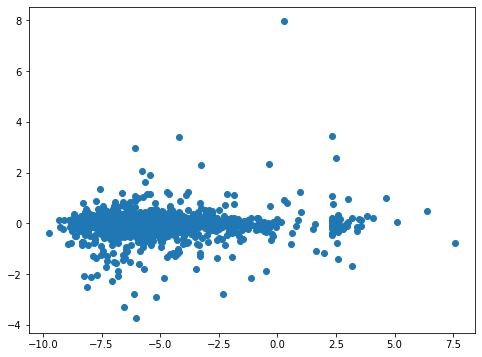

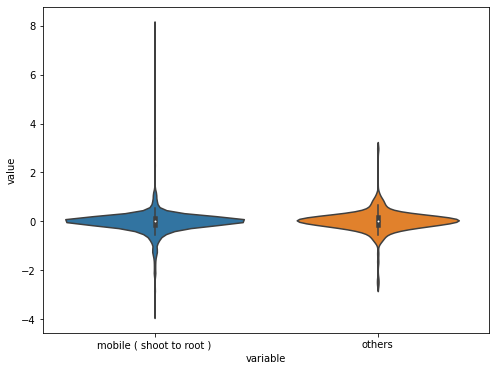

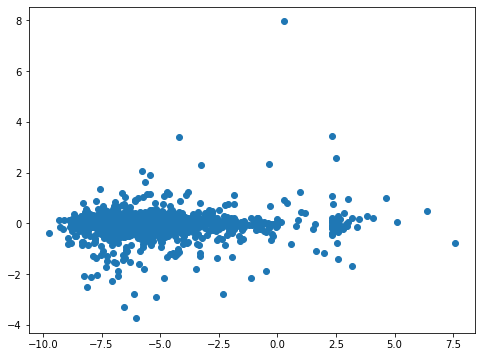

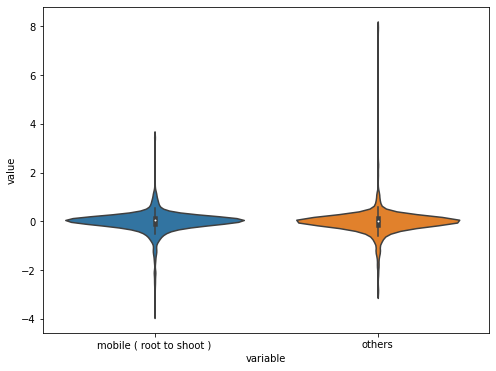

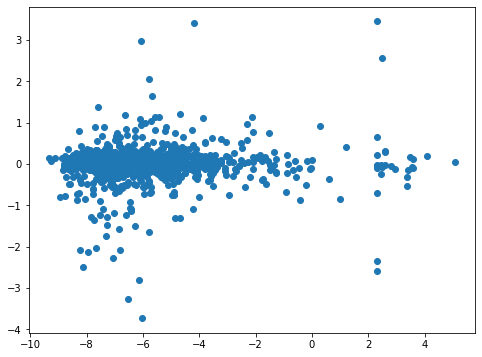

In [295]:
directions = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']
for d in directions:
    mobile_d_index = list(df_mobile_value[d].dropna().index)
    mobile_index = list(df_mobile_value.index)

    for ne in not_exist:
        try:
            mobile_d_index.remove(ne)
            mobile_index.remove(ne)
        except ValueError:
            pass
    mobile_d = df_deltaN_lfc.loc[mobile_d_index, "log2FC"]

    others_index = list(np.setdiff1d(mobile_index, mobile_d_index))
    for ne in not_exist:
        try:
            others_index.remove(ne)
        except ValueError:
            pass
    # others_index = np.setdiff1d(df_deltaN_lfc.index, mobile_d)
    others = df_deltaN_lfc.loc[others_index, "log2FC"]
    
    df_m = pd.DataFrame({f"mobile ( {d} )":mobile_d})
    df_n_m = pd.DataFrame({"others":others})
    df_cat_loc_t_melt = pd.concat([df_m, df_n_m], axis=1).melt()
    plt.figure(figsize=(8,6))
    sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)
    plt.figure(figsize=(8,6))
    plt.scatter(df_mobile_value.loc[mobile_d_index, 'Unnamed: 14'], df_deltaN_lfc.loc[mobile_d_index, "log2FC"])

<AxesSubplot:xlabel='variable', ylabel='value'>

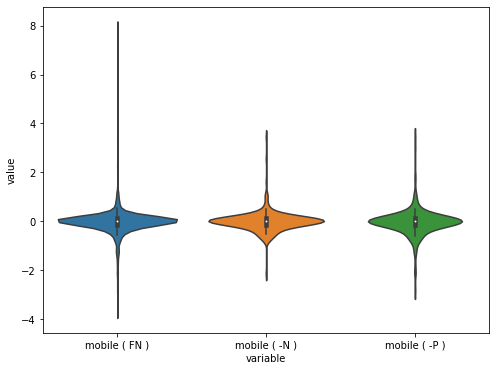

In [297]:
conditions = ['FN', '-N', '-P']

mobile_c_index_1 = list(df_mobile_value[conditions[0]].dropna().index)
mobile_c_index_2 = list(df_mobile_value[conditions[1]].dropna().index)
mobile_c_index_3 = list(df_mobile_value[conditions[2]].dropna().index)
indices = [mobile_c_index_1, mobile_c_index_2, mobile_c_index_3]

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    for i in indices:
        try:
            i.remove(ne)
        except ValueError:
            pass
# for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
#     try:
#         mobile_r_index.remove(ne)
#     except ValueError:
#         pass

mobile_1 = df_deltaN_lfc.loc[mobile_c_index_1, "log2FC"]
mobile_2 = df_deltaN_lfc.loc[mobile_c_index_2, "log2FC"]
mobile_3 = df_deltaN_lfc.loc[mobile_c_index_3, "log2FC"]

df_1 = pd.DataFrame({f"mobile ( {conditions[0]} )":mobile_1})
df_2 = pd.DataFrame({f"mobile ( {conditions[1]} )":mobile_2})
df_3 = pd.DataFrame({f"mobile ( {conditions[2]} )":mobile_3})
df_cat_loc_t_melt = pd.concat([df_1, df_2, df_3], axis=1).melt()

plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

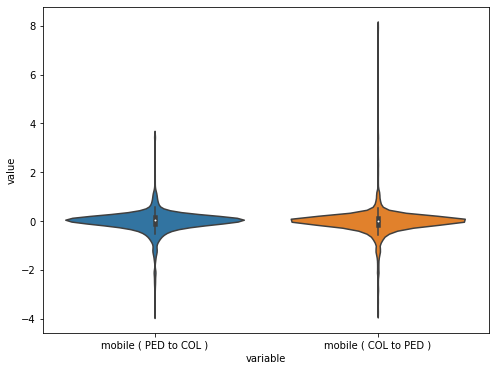

In [291]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[0]].dropna().index)
mobile_r_index = list(df_mobile_value[d[1]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[mobile_d_index, "log2FC"]
mobile_r = df_deltaN_lfc.loc[mobile_r_index, "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[0]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[1]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

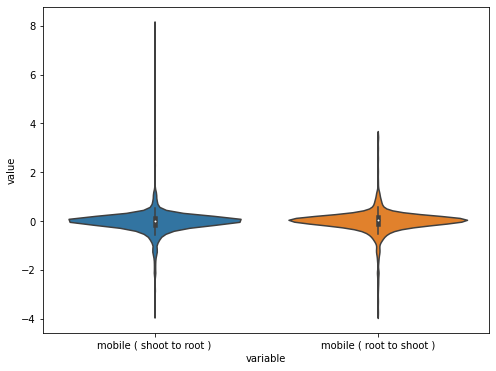

In [292]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[2]].dropna().index)
mobile_r_index = list(df_mobile_value[d[3]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[mobile_d_index, "log2FC"]
mobile_r = df_deltaN_lfc.loc[mobile_r_index, "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[2]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[3]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

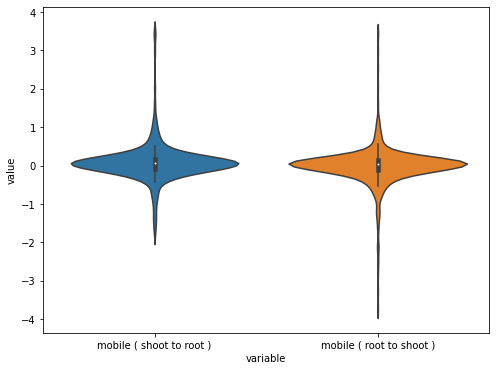

In [318]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[2]].dropna().index)
mobile_r_index = list(df_mobile_value[d[3]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_d_index), "log2FC"]
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_r_index), "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[2]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[3]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

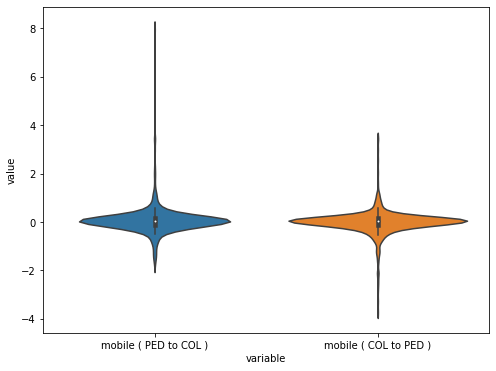

In [319]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[0]].dropna().index)
mobile_r_index = list(df_mobile_value[d[1]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_d_index), "log2FC"]
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_r_index), "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[0]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[1]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

In [246]:
x = pd.DataFrame(df_mobile_value.loc[mobile_value_index, 'Unnamed: 14'])
x.columns = ["col"]
y = pd.DataFrame(df_deltaN_lfc.loc[mobile_value_index, "log2FC"])
y.columns = ["col"]

In [247]:
res=x.corrwith(y)

In [248]:
print(res)

col    0.011589
dtype: float64


In [ ]:
d

In [249]:
x

,col
AT1G01040,-6.074677
AT1G01300,-6.004501
AT1G01360,-5.638074
AT1G01540,-4.722466
AT1G01720,-6.364667
...,...
AT5G67400,2.321928
AT5G67470,-4.915965
AT5G67500,-6.090995
AT5G67560,-6.684287


In [250]:
y

,col
AT1G01040,0.161664
AT1G01300,0.130459
AT1G01360,0.038612
AT1G01540,0.346974
AT1G01720,-0.261326
...,...
AT5G67400,-0.701112
AT5G67470,0.471497
AT5G67500,-0.016829
AT5G67560,-0.009639
